---
## Name : Pathik Prashant Ghugare
## Roll No : 1911014
## Div : A
## Topic : CNN model for American Sign Language Recognition
---

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing data

In [ ]:
filepath_train = '/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv'
filepath_test = '/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv'

def import_data(filepath):
    
    X = pd.read_csv(filepath).drop('label',axis= 1)
    y = pd.read_csv(filepath).loc[:,'label']
    
    return (np.array(X), np.array(y))

X_train,y_train = import_data(filepath_train)
X_test,y_test = import_data(filepath_test)

# Preprocessing

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
X_train.shape[0] 

In [ ]:
np.unique(y_train)

In [ ]:
#we want the labels ordered from 0 to 23 
# since 9,25 is missing 
for i in range(10,25,1):
    y_train[y_train == i] = i-1
    y_test[y_test == i] = i-1

In [ ]:
y_train.shape

In [ ]:
np.unique(y_train)

In [ ]:
plt.figure(figsize = (30,15))

plt.xticks(size=30)
sns.countplot(y_train,linewidth = 3,edgecolor=sns.color_palette("Set2"))
plt.title('Partition of label in the train dataset', fontdict={'color' : 'Black' , 'fontsize' : 30})

plt.show()

# Data Visualization

In [ ]:
num_letters = {0 : 'A' , 1 : 'B', 2 : 'C' , 3 : 'D', 4: 'E' , 5 : 'F',
                     6 : 'G' , 7 : 'H' , 8 : 'I' , 9 : 'K' , 
                     10 : 'L' , 11 :'M' , 12 : 'N' , 13 : 'O' , 14 : 'P',
                     15 : 'Q' , 16 : 'R' , 17 : 'S' , 18 :'T' , 19 : 'U',
                     20 : 'V' , 21 :'W' , 22 : 'X', 23 : 'Y'}

In [ ]:
L = 6
W = 6 
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in range(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28),cmap='gray')
    axes[i].set_title("True Sign = "+str(num_letters[y_test[i]]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
print('Shape of X_train : {} , Shape of X_test : {}' .format(X_train.shape,X_test.shape))
print('Shape of y_train : {} , Shape of y_test : {}' .format(y_train.shape,y_test.shape))

In [ ]:
# since X_train[i] data is of shape (784,)  reshape image to 28,28
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

X_train.shape

## Architecture Referred from [Research Paper](http://link.springer.com.library.somaiya.edu/chapter/10.1007/978-981-15-7961-5_6)

In [ ]:
# Normalize pixel values to be between 0 and 1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=(1./255))

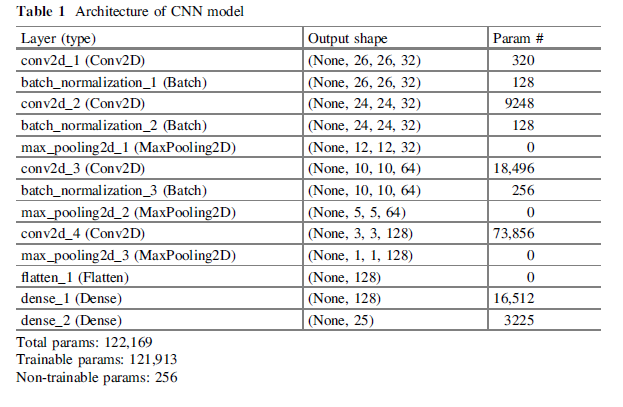

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24,activation='softmax')) 
model.summary()

In [ ]:
X_train.shape

In [ ]:
model.compile(optimizer='adam' ,metrics = ['accuracy'],loss = 'categorical_crossentropy')

history=model.fit_generator(datagen.flow(X_train, y_train),steps_per_epoch=21964//128,epochs=50,validation_data=(X_test, y_test),validation_steps=5491//128, use_multiprocessing=True)

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("model accuracy : {}%".format(acc*100))

In [ ]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')

plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

## Architecture Referred from [Kaggle](https://www.kaggle.com/chemamasamuel/cnn-for-beginner-tensorflow-keras-99-accuracy/data)

In [ ]:
# we are going to use data generator to train the CNN
train_datagen = ImageDataGenerator(rescale=1./255 ,
                                   rotation_range = 40,
                                   horizontal_flip=True,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode = 'nearest')
X_test = X_test/255

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 256,kernel_size = (5,5),padding = 'same',activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 128,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 64,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 32,kernel_size = (5,5),padding = 'same',activation = 'relu'))


model.add(Flatten())

model.add(Dense(units = 256,activation = 'relu'))
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(24,activation = 'softmax'))

model.summary()

In [ ]:
model.compile(optimizer='adam',metrics = ['accuracy'],loss = 'categorical_crossentropy')
history = model.fit(train_datagen.flow(X_train,y_train,batch_size = 300),validation_data=(X_test,y_test),epochs = 50)

In [ ]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')

plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("model accuracy : {}%".format(acc*100))

In [ ]:
y_pred = model.predict(X_test)

y_pred2 = np.array([np.argmax(y_pred[i]) for i in range(len(y_pred))])
y_test2 = np.array([np.argmax(y_test[i]) for i in range(len(y_test))])

In [ ]:
L = 6
W = 2
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i],cmap='gray')
    axes[i].set_title('True : {} , Predicted : {} with {} % of accuracy '.format(num_letters[y_test2[i]],
                                                                            num_letters[y_pred2[i]],
                                                                            round(y_pred[i][y_pred2[i]]*100,2)
                                                                            ))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# Prediction for each class

In [ ]:
for indx, char in num_letters.items():
    x, y = [] , []
    for i in range(len(X_test)): 
        if y_test2[i] == indx :
            x.append(X_test[i])
            y.append(y_test[i])
    x = np.array(x)
    y = np.array(y)
    print("number of images for {} : {}".format(char,len(y)))
    loss, acc = model.evaluate(x,y)
    print("accuracy for {} : {} %".format(char, acc*100))
    print()
                

# Thank You !